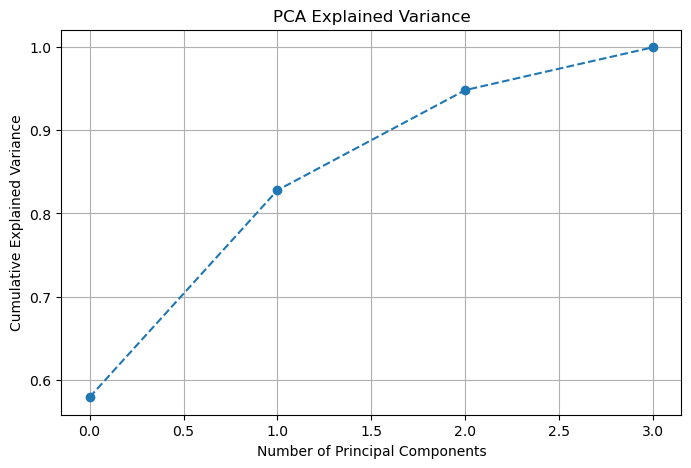

Number of Principal Components Selected: 4
SVR Linear kernel
Mean Absolute Error: 36.60439585983505
Mean Squared Error: 53.59268296142037
R2 Score: 0.5750630866056154


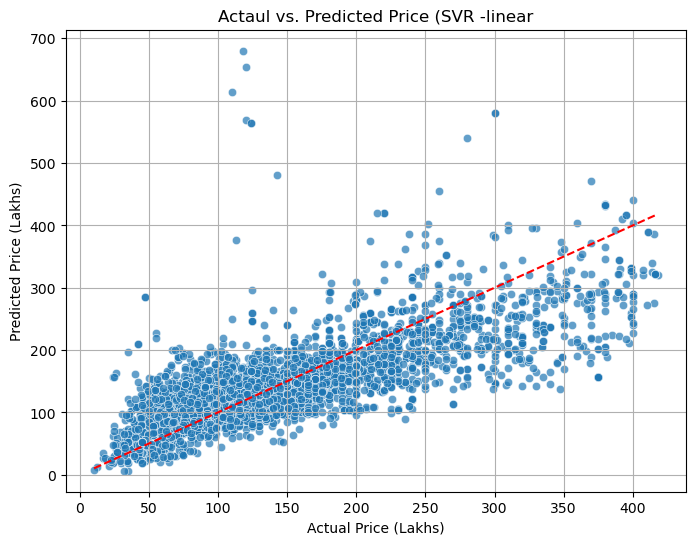

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('Cleared_Quickr.csv')


df.drop(columns=["Unnamed: 0"], inplace=True)


Q1 = df["Price (Lakhs)"].quantile(0.25)
Q3 = df["Price (Lakhs)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df["Price (Lakhs)"] >= lower_bound) & (df["Price (Lakhs)"] <= upper_bound)]

X = df.drop(columns=["Price (Lakhs)"]) 
y= df["Price (Lakhs)"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca= PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


print(f"Number of Principal Components Selected: {X_pca.shape[1]}")


X_train, X_test, y_train, y_test = train_test_split(X_pca, y , test_size=0.2, random_state=42)


svr_model = SVR(kernel= 'linear', C=0.1, epsilon=1.0)
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2 = r2_score(y_test, y_pred_svr)

print("SVR Linear kernel")
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", rmse)
print("R2 Score:", r2)

plt.figure(figsize=(8, 6 ))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.7)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actaul vs. Predicted Price (SVR -linear")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.grid()
plt.show()

